In [1]:
import yfinance as yf
import pandas as pd
from icecream import ic 
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import datetime
import numpy as np

# for qq plot
import statsmodels.api as sm
import pylab as py



In [2]:
#statics for this analysis
start = "2015-06-30"
end = '2021-12-31'
stockcode1 = 'AAPL'
stockcode2 = 'AAPL'

In [3]:

s1ticker = yf.Ticker(stockcode1)
s2ticker = yf.Ticker(stockcode2)

#using this method to download stock prices would have all corp action adjusted for all open, high, low and close
s1 = s1ticker.history(start=start,  end=end)
s2 = s2ticker.history(start=start,  end=end)

### Get Option Info

In [4]:
s1ticker.options

('2022-01-07',
 '2022-01-14',
 '2022-01-21',
 '2022-01-28',
 '2022-02-04',
 '2022-02-11',
 '2022-02-18',
 '2022-03-18',
 '2022-04-14',
 '2022-05-20',
 '2022-06-17',
 '2022-07-15',
 '2022-09-16',
 '2023-01-20',
 '2023-03-17',
 '2023-06-16',
 '2023-09-15',
 '2024-01-19')

In [5]:
#s2ticker.options

In [6]:

#get option chain calls data for specific expiration date

#this part is dummy to create the dataframe - should be rewritten xxx
opt = s1ticker.option_chain(date=s1ticker.options[0]).calls
opt['Maturity'] = s1ticker.options[0]
opt['TTM'] = (np.datetime64(s1ticker.options[0]) - np.datetime64('today'))  / np.timedelta64(1, 'D')
opt['Maturity1']  = pd.to_datetime(opt['Maturity'], format='%Y-%m-%d')
opt['TTM1'] = (opt['Maturity1'] - opt['lastTradeDate'])  / np.timedelta64(1, 'D')
opt = opt[0:0]


for i in s1ticker.options:
    opt1 = s1ticker.option_chain(date=i).calls
    opt1['Maturity'] = i
    opt1['TTM'] = (np.datetime64(i) - np.datetime64('today'))  / np.timedelta64(1, 'D')
    opt1['Maturity1']  = pd.to_datetime(opt1['Maturity'], format='%Y-%m-%d')
    opt1['TTM1'] = (opt1['Maturity1'] - opt1['lastTradeDate'])  / np.timedelta64(1, 'D')
    opt = opt.append(opt1)


In [7]:
opt

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,Maturity,TTM,Maturity1,TTM1
0,AAPL220107C00105000,2022-01-05 19:28:20,105.0,72.25,0.0,0.0,0.0,0.0,6.0,12.0,0.000010,True,REGULAR,USD,2022-01-07,1.0,2022-01-07,1.188657
1,AAPL220107C00110000,2022-01-05 14:35:17,110.0,68.45,0.0,0.0,0.0,0.0,8.0,4.0,0.000010,True,REGULAR,USD,2022-01-07,1.0,2022-01-07,1.392164
2,AAPL220107C00115000,2022-01-05 20:18:58,115.0,61.25,0.0,0.0,0.0,0.0,3.0,3.0,0.000010,True,REGULAR,USD,2022-01-07,1.0,2022-01-07,1.153495
3,AAPL220107C00120000,2022-01-05 18:04:03,120.0,58.25,0.0,0.0,0.0,0.0,4.0,412.0,0.000010,True,REGULAR,USD,2022-01-07,1.0,2022-01-07,1.247187
4,AAPL220107C00125000,2022-01-03 20:31:11,125.0,57.11,0.0,0.0,0.0,0.0,5.0,5.0,0.000010,True,REGULAR,USD,2022-01-07,1.0,2022-01-07,3.145012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,AAPL240119C00235000,2022-01-05 20:54:30,235.0,13.05,0.0,0.0,0.0,0.0,212.0,1462.0,0.031260,False,REGULAR,USD,2024-01-19,743.0,2024-01-19,743.128819
38,AAPL240119C00240000,2022-01-05 20:58:16,240.0,11.90,0.0,0.0,0.0,0.0,5.0,2728.0,0.062509,False,REGULAR,USD,2024-01-19,743.0,2024-01-19,743.126204
39,AAPL240119C00245000,2022-01-05 20:58:17,245.0,11.00,0.0,0.0,0.0,0.0,28.0,378.0,0.062509,False,REGULAR,USD,2024-01-19,743.0,2024-01-19,743.126192
40,AAPL240119C00250000,2022-01-05 20:46:48,250.0,10.50,0.0,0.0,0.0,0.0,38.0,4385.0,0.062509,False,REGULAR,USD,2024-01-19,743.0,2024-01-19,743.134167


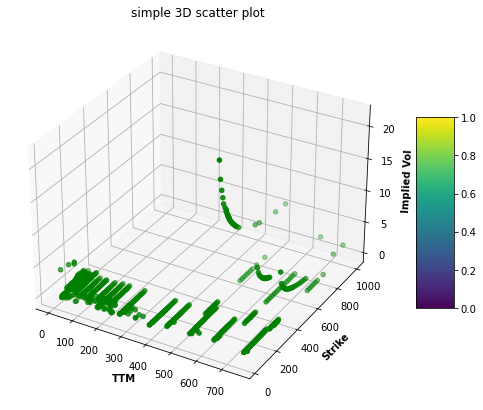

In [8]:

# Import libraries
from mpl_toolkits import mplot3d
 
 
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
sctt =ax.scatter3D(opt['TTM1'], opt['strike'], opt['impliedVolatility'], color = "green")
plt.title("simple 3D scatter plot")

ax.set_xlabel('TTM', fontweight ='bold')
ax.set_ylabel('Strike', fontweight ='bold')
ax.set_zlabel('Implied Vol', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)

# show plot
plt.show()

Text(0.5, 0, 'Implied Vol')

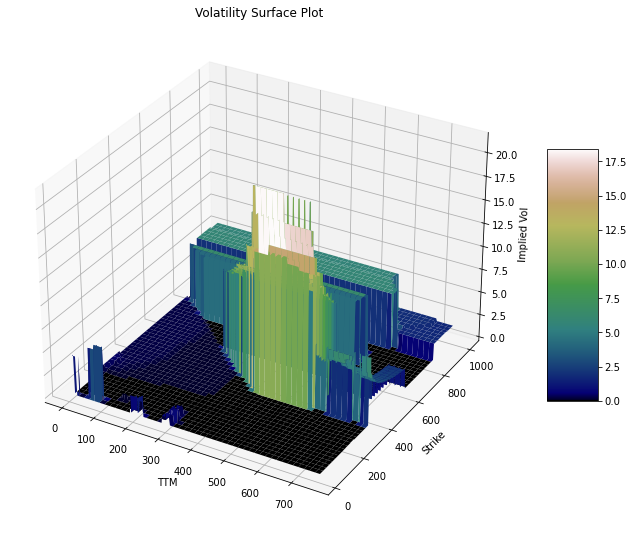

In [9]:
import os
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

fig = plt.figure(figsize = (10, 7))
ax = Axes3D(fig)

X = opt['TTM1']
Y = opt['strike']
Z = opt['impliedVolatility']
xi = np.linspace(X.min(),X.max(),(len(Z)//3))
yi = np.linspace(Y.min(),Y.max(),(len(Z)//3))
zi = griddata((X, Y), Z, (xi[None,:], yi[:,None]), method='nearest')

xig, yig = np.meshgrid(xi, yi)

surf = ax.plot_surface(xig, yig, zi, cmap='gist_earth')
fig.colorbar(surf, ax = ax, shrink=0.5, aspect=5)
ax.set_title('Volatility Surface Plot')
ax.set_xlabel('TTM')
ax.set_ylabel('Strike')
ax.set_zlabel('Implied Vol')
#ax.set_zlim3d(0,3)